<a href="https://colab.research.google.com/github/YuTian8328/X_ray_images/blob/master/CATP_VGG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, AvgPool2D, Input, Dropout, Flatten, BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import GlobalAveragePooling2D,InputLayer
from keras.applications.vgg19 import VGG19
from keras.metrics import Recall


In [15]:
images=np.load('/content/drive/My Drive/Agg/images.npy')
severity=np.load('/content/drive/My Drive/Agg/severity.npy')

In [16]:
severity=np.where(severity==3, 2, severity) 
np.unique(severity)

array([0, 1, 2])

In [17]:
#Transform the shape of y
def convert_to_one_hot(Y):
    Y = np.eye(3)[Y]
    return Y

In [18]:
y=convert_to_one_hot(severity)
print(y.shape)

(12474, 3)


In [19]:
from sklearn.model_selection import train_test_split
X_tval, X_test, y_tval, y_test = train_test_split(images, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_tval, y_tval, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8980, 200, 150, 3)
(8980, 3)


In [ ]:
# X_train=X_train.astype('float16')/255.0

In [ ]:
# X_val=X_val.astype('float16')/255.0

In [ ]:
# inputs=Input(shape=(None,200, 150, 3))

In [ ]:
from tensorflow.keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(200, 150, 3))

In [ ]:
conv_base.trainable = False

In [ ]:
model = tf.keras.models.Sequential()

# add convolutional base as layer 
model.add(conv_base)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.BatchNormalization(axis=1))
model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(.5))
model.add(tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)))
# model.add(tf.keras.layers.LayerNormalization(axis=1))
# model.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)))
# model.add(tf.keras.layers.Dropout(.2))
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(3,activation="softmax"))

# display model summary


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 6, 4, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [ ]:
def print_layers(model):
    for idx, layer in enumerate(model.layers):
        print("layer {}: {}, trainable: {}".format(idx, layer.name, layer.trainable))

print_layers(model)

layer 0: vgg19, trainable: False
layer 1: global_average_pooling2d, trainable: True
layer 2: batch_normalization, trainable: True
layer 3: dense, trainable: True
layer 4: dense_1, trainable: True
layer 5: dropout, trainable: True
layer 6: dense_2, trainable: True
layer 7: dense_3, trainable: True


In [ ]:
# model_chkpoint = ModelCheckpoint(filepath='/content/drive/My Drive/Agg/vgg/vgg_base_best_weights',save_best_only=True, save_weights_only=True)


In [ ]:
# adam = Adam(lr = 0.0001)
model.compile(loss='categorical_crossentropy', metrics=[Recall(class_id=2),'accuracy'], optimizer=RMSprop(lr = 0.001))
history=model.fit(X_train, y_train, epochs=20, batch_size=128, class_weight={0:1,1:1,2:2}, validation_data=(X_val,y_val))

Epoch 1/20
71/71 [==============================] - 32s 451ms/step - loss: 1.8964 - recall: 0.6626 - accuracy: 0.4683 - val_loss: 1.4176 - val_recall: 0.7497 - val_accuracy: 0.5485
Epoch 2/20
71/71 [==============================] - 30s 421ms/step - loss: 1.3934 - recall: 0.7875 - accuracy: 0.5920 - val_loss: 1.1184 - val_recall: 0.7153 - val_accuracy: 0.6042
Epoch 3/20
71/71 [==============================] - 30s 428ms/step - loss: 1.1416 - recall: 0.8255 - accuracy: 0.6468 - val_loss: 0.9395 - val_recall: 0.7730 - val_accuracy: 0.6603
Epoch 4/20
71/71 [==============================] - 31s 437ms/step - loss: 0.9724 - recall: 0.8559 - accuracy: 0.6938 - val_loss: 0.9085 - val_recall: 0.8393 - val_accuracy: 0.6581
Epoch 5/20
71/71 [==============================] - 31s 443ms/step - loss: 0.8606 - recall: 0.8720 - accuracy: 0.7224 - val_loss: 0.8289 - val_recall: 0.8491 - val_accuracy: 0.7017
Epoch 6/20
71/71 [==============================] - 31s 443ms/step - loss: 0.7471 - recall: 0.8

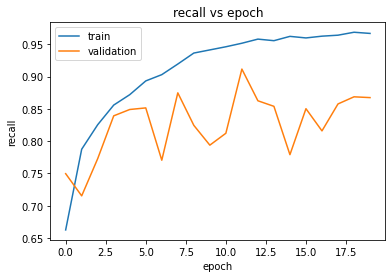

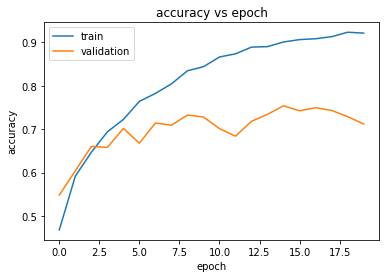

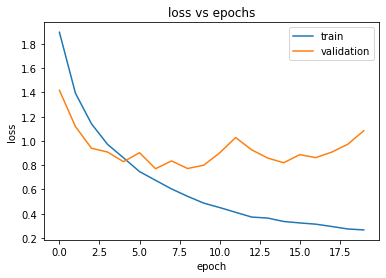

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['recall'])
# plot validation accuracy
plt.plot(history.history['val_' + 'recall'])
# set title
plt.title('recall vs epoch')
# set x and y axis labels
plt.ylabel('recall')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

plt.plot(history.history['accuracy'])
# plot validation accuracy
plt.plot(history.history['val_' + 'accuracy'])
# set title
plt.title('accuracy vs epoch')
# set x and y axis labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

###-----plot loss---------------
# plot training loss
plt.plot(history.history['loss'])
# plot validation loss
plt.plot(history.history['val_loss'])
# set title
plt.title('loss vs epochs')
# set x and y axis labels
plt.ylabel('loss')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper right')
# display the plot
plt.show()

	
image: ![Alt](/wp.png "Title")

In [ ]:
model_json = model.to_json()
with open("/content/drive/My Drive/Agg//vgg/vgg_base_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
y_test[0]

array([0., 1., 0.])

In [ ]:
# Perfomance on test set
from sklearn.metrics import classification_report

y_pred = model.predict(X_test,verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
print(classification_report(y_test_bool, y_pred_bool))


39/39 [==============================] - 4s 98ms/step
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       315
           1       0.68      0.67      0.67       490
           2       0.71      0.84      0.77       443

    accuracy                           0.72      1248
   macro avg       0.73      0.71      0.71      1248
weighted avg       0.72      0.72      0.71      1248



In [ ]:
# Performance on validation set

y_val_pred = model.predict(X_val, batch_size=32,verbose=1)
y_val_pred_bool = np.argmax(y_val_pred, axis=1)
y_val_bool = np.argmax(y_val, axis=1)
print(classification_report(y_val_bool,y_val_pred_bool, ))


71/71 [==============================] - 8s 106ms/step
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       527
           1       0.71      0.62      0.66       904
           2       0.72      0.87      0.79       815

    accuracy                           0.71      2246
   macro avg       0.71      0.70      0.70      2246
weighted avg       0.71      0.71      0.71      2246



In [ ]:
model.evaluate(X_test, y_test,batch_size=64)


20/20 [==============================] - 4s 179ms/step - loss: 1.0796 - recall: 0.8330 - accuracy: 0.7171


[1.0796027183532715, 0.8329570889472961, 0.7171474099159241]

In [ ]:

# unfreeeze all layers
conv_base.trainable = True

# freeze all layers except the last 4 
for layer in conv_base.layers[:-4]:
    layer.trainable = False

# print the trainable status of individual layers
for layer in conv_base.layers:
  print(layer,"  ",  layer.trainable)
model.summary()

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fe96086f080>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe958a5da58>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe958a7c358>    False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe958a7c710>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe958248400>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe95040a278>    False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe95040a6a0>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe95040ae80>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe950417cf8>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe9504179b0>    False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe95041d9e8>    False
<tensorflow.python.keras.layer

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=[Recall(class_id=2),'accuracy'], optimizer=RMSprop(lr = 0.00001))


In [ ]:
model_chkpoint = ModelCheckpoint(filepath='/content/drive/My Drive/Agg//vgg/vgg_base_best_weights',save_best_only=True, save_weights_only=True)


In [ ]:
history_fine_tune=model.fit(X_train, y_train, epochs=40, initial_epoch =  history.epoch[-1], batch_size=128, class_weight={0:1,1:1,2:2}, \
                            callbacks=[model_chkpoint],validation_data=(X_val,y_val))


Epoch 20/40
71/71 [==============================] - 36s 511ms/step - loss: 0.2421 - recall_1: 0.9833 - accuracy: 0.9275 - val_loss: 0.9396 - val_recall_1: 0.8736 - val_accuracy: 0.7507
Epoch 21/40
71/71 [==============================] - 36s 506ms/step - loss: 0.2123 - recall_1: 0.9809 - accuracy: 0.9398 - val_loss: 0.9199 - val_recall_1: 0.8466 - val_accuracy: 0.7458
Epoch 22/40
71/71 [==============================] - 36s 507ms/step - loss: 0.1910 - recall_1: 0.9836 - accuracy: 0.9486 - val_loss: 0.8410 - val_recall_1: 0.8307 - val_accuracy: 0.7645
Epoch 23/40
71/71 [==============================] - 36s 500ms/step - loss: 0.1841 - recall_1: 0.9833 - accuracy: 0.9504 - val_loss: 0.9271 - val_recall_1: 0.7804 - val_accuracy: 0.7569
Epoch 24/40
71/71 [==============================] - 36s 500ms/step - loss: 0.1765 - recall_1: 0.9830 - accuracy: 0.9506 - val_loss: 0.9393 - val_recall_1: 0.8025 - val_accuracy: 0.7636
Epoch 25/40
71/71 [==============================] - 36s 500ms/step - 

In [ ]:

# earlier model
history.history['accuracy'] += history_fine_tune.history['accuracy']
history.history['val_accuracy'] += history_fine_tune.history['val_accuracy']

history.history['recall'] += history_fine_tune.history['recall_1']
history.history['val_recall'] += history_fine_tune.history['val_recall_1']
history.history['loss'] += history_fine_tune.history['loss']
history.history['val_loss'] += history_fine_tune.history['val_loss']

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_' + 'recall'])


# set title
plt.title('recall vs epoch')
# set x and y axis labels
plt.ylabel('recall')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

plt.plot(history.history['accuracy'])
# plot validation accuracy
plt.plot(history.history['val_' + 'accuracy'])
# set title
plt.title('accuracy vs epoch')
# set x and y axis labels
plt.ylabel('accuracy')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper left')
# display the plot
plt.show()

###-----plot loss---------------
# plot training loss
plt.plot(history.history['loss'])
# plot validation loss
plt.plot(history.history['val_loss'])
# set title
plt.title('loss vs epochs')
# set x and y axis labels
plt.ylabel('loss')
plt.xlabel('epoch')
# set the legend
plt.legend(['train', 'validation'], loc='upper right')
# display the plot
plt.show()

In [ ]:
model_json = model.to_json()
with open("/content/drive/My Drive/Agg//vgg/vgg_base_model.json", "w") as json_file:
    json_file.write(model_json)

In [11]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/My Drive/Agg/chest_xray_base_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_a_test = model_from_json(loaded_model_json)
# load weights into new model
model_a_test.load_weights("/content/drive/My Drive/Agg/chest_xray_base_best_weights")

# base_learning_rate = 1e-5

model_a_test.compile(loss='categorical_crossentropy', metrics=[metrics.Recall(class_id=2),'accuracy'], optimizer=RMSprop(lr = 0.00001))

y_pred = model_a_test.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report

report_a=classification_report(y_test_bool, y_pred_bool,output_dict=True)
report_a

20/20 [==============================] - 390s 20s/step


{'0': {'f1-score': 0.6805778491171749,
  'precision': 0.6883116883116883,
  'recall': 0.6730158730158731,
  'support': 315},
 '1': {'f1-score': 0.6687763713080168,
  'precision': 0.6921397379912664,
  'recall': 0.6469387755102041,
  'support': 490},
 '2': {'f1-score': 0.7978378378378379,
  'precision': 0.7655601659751037,
  'recall': 0.8329571106094809,
  'support': 443},
 'accuracy': 0.719551282051282,
 'macro avg': {'f1-score': 0.7157306860876765,
  'precision': 0.7153371974260194,
  'recall': 0.717637253045186,
  'support': 1248},
 'weighted avg': {'f1-score': 0.7175677937299685,
  'precision': 0.7172354222442896,
  'recall': 0.719551282051282,
  'support': 1248}}

In [4]:
import json

In [12]:


with open('/content/drive/My Drive/Agg/vgg/report_a.json', 'w') as fp:
    json.dump(report_a, fp)

In [12]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/My Drive/Agg/vgg/vgg_base_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_b = model_from_json(loaded_model_json)
# load weights into new model
model_b.load_weights("/content/drive/My Drive/Agg/vgg/vgg_base_best_weights")

# base_learning_rate = 1e-5

In [20]:
from keras import metrics
from keras.optimizers import RMSprop
model_b.compile(loss='categorical_crossentropy', metrics=[metrics.Recall(class_id=2),'accuracy'], optimizer=RMSprop(lr = 0.00001))

y_pred = model_b.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_test_bool = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report

report_b=classification_report(y_test_bool, y_pred_bool,output_dict=True)
# report_b

20/20 [==============================] - 226s 11s/step


{'0': {'f1-score': 0.7606557377049181,
  'precision': 0.7864406779661017,
  'recall': 0.7365079365079366,
  'support': 315},
 '1': {'f1-score': 0.7242063492063493,
  'precision': 0.7046332046332047,
  'recall': 0.7448979591836735,
  'support': 490},
 '2': {'f1-score': 0.8041002277904329,
  'precision': 0.8114942528735632,
  'recall': 0.7968397291196389,
  'support': 443},
 'accuracy': 0.7612179487179487,
 'macro avg': {'f1-score': 0.7629874382339001,
  'precision': 0.7675227118242899,
  'recall': 0.7594152082704163,
  'support': 1248},
 'weighted avg': {'f1-score': 0.7617660812494569,
  'precision': 0.7632139726382859,
  'recall': 0.7612179487179487,
  'support': 1248}}

In [21]:
with open('/content/drive/My Drive/Agg/vgg/report_b.json', 'w') as fp:
    json.dump(report_b, fp)

In [22]:
with open('/content/drive/My Drive/Agg/vgg/report_b.json', 'r') as fp:
    report_b = json.load(fp)
# report_b

{'0': {'f1-score': 0.7606557377049181,
  'precision': 0.7864406779661017,
  'recall': 0.7365079365079366,
  'support': 315},
 '1': {'f1-score': 0.7242063492063493,
  'precision': 0.7046332046332047,
  'recall': 0.7448979591836735,
  'support': 490},
 '2': {'f1-score': 0.8041002277904329,
  'precision': 0.8114942528735632,
  'recall': 0.7968397291196389,
  'support': 443},
 'accuracy': 0.7612179487179487,
 'macro avg': {'f1-score': 0.7629874382339001,
  'precision': 0.7675227118242899,
  'recall': 0.7594152082704163,
  'support': 1248},
 'weighted avg': {'f1-score': 0.7617660812494569,
  'precision': 0.7632139726382859,
  'recall': 0.7612179487179487,
  'support': 1248}}

In [8]:
with open('/content/drive/My Drive/Agg/vgg/report_a.json', 'r') as fp:
    report_a = json.load(fp)
# report_a

{'0': {'f1-score': 0.6805778491171749,
  'precision': 0.6883116883116883,
  'recall': 0.6730158730158731,
  'support': 315},
 '1': {'f1-score': 0.6687763713080168,
  'precision': 0.6921397379912664,
  'recall': 0.6469387755102041,
  'support': 490},
 '2': {'f1-score': 0.7978378378378379,
  'precision': 0.7655601659751037,
  'recall': 0.8329571106094809,
  'support': 443},
 'accuracy': 0.719551282051282,
 'macro avg': {'f1-score': 0.7157306860876765,
  'precision': 0.7153371974260194,
  'recall': 0.717637253045186,
  'support': 1248},
 'weighted avg': {'f1-score': 0.7175677937299685,
  'precision': 0.7172354222442896,
  'recall': 0.719551282051282,
  'support': 1248}}

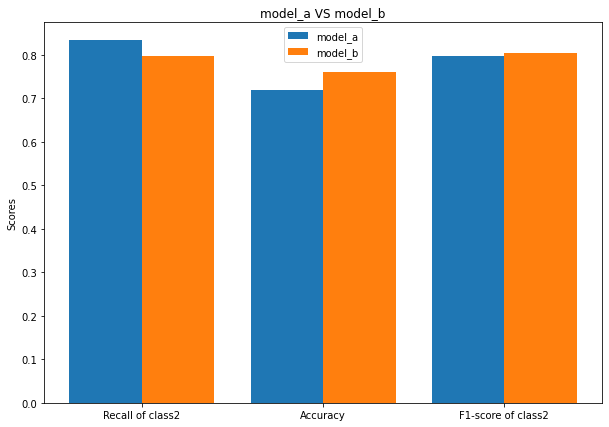

In [31]:
import matplotlib.pyplot as plt
labels=['Recall of class2','Accuracy','F1-score of class2']
a=[report_a['2']['recall'],report_a['accuracy'],report_a['2']['f1-score']]
b=[report_b['2']['recall'],report_b['accuracy'],report_b['2']['f1-score']]
fig, ax = plt.subplots(figsize=(10,7))
ax.bar(np.arange(len(labels))-0.2,a,width=0.4,label='model_a')
ax.bar(np.arange(len(labels))+0.2,b, width=0.4,label='model_b')
ax.set_ylabel('Scores')
ax.set_title('model_a VS model_b')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.legend()
#model_a

# **Discussion**
###Conceptual difference between the optimization metric (loss function) and overall model evaluation metric
1. They are both function of y_true and y_test:
$$F(Y,H_\Theta(X))$$

2. According to the document of keras:
> Metrics

>* A metric is a function that is used to judge the performance of your model.
>* Metric functions are similar to loss functions, except that the results from evaluating a metric are not used when training the model. 
>* Note that you may use any ***loss function*** as a metric.

3. Either the choice of loss function or evaluation metric should be exactly aligned  with the problem itself.




